# Raven Jiang -- MSIS 502 Final Project

I. Dataset Description
- Where you got it
- Why the source is reliable
- How it was gathered (study info, participants, etc.)
- What each column contains and any applicable measurment units

I obtained the dataset from Kaggle.com, which is a reliable source for dataset downloads for data scientists. The data selected is restaraunt inspections for permitted food establishments in the NYC area. The data set was provided by Department of Health and Mental Hygiene, and it is also a trustable public govermental agency to perform inspections and record the data.

The original data set has inspections spanning from Jan 1, 2010 to Aug 29, 2017. Nonetheless, I  decided to cut it to August 30, 2016 - August 29, 2017, due to difficulties of running a large dataset, like the overwhelming amount of qualitive notes from inspections, lags in running codes, etc.)

Columns are below:
- CAMIS: Unique identifier for the establishment (restaurant)
- DBA: Establishment (restaurant) name
- BORO: Borough of establishment (restaurant) location
- BUILDING: Building number for establishment (restaurant) location
- STREET: Street name for establishment (restaurant) location
- ZIPCODE: Zip code of establishment (restaurant) location
- PHONE(*dropped): Phone number
- CUISINE DESCRIPTION: Establishment (restaurant) cuisine
- INSPECTION DATE: ..
- ACTION(*dropped): Action associated with each establishment (restaurant) inspection
        -"• Violations were cited in the following area(s).
          • No violations were recorded at the time of this inspection.
          • Establishment re-opened by DOHMH
          • Establishment re-closed by DOHMH
          • Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.
          • ""Missing"" = not yet inspected"    
- VIOLATION CODE: Violation code associated with an establishment (restaurant) inspection
- VIOLATION DESCRIPTION(*dropped): Violation description associated with an establishment  (restaurant) inspection
- CRITICAL FLAG: Indicator of critical violation
        "• Critical
         • Not Critical
         • Not Applicable"
- SCORE: Total score for a particular inspection
- GRADE: Grade associated with the inspection
- GRADE DATE(*dropped): Date when grade was issued to the establishment (restaurant)
- RECORD DATE(*dropped): Date record was added to dataset
- INSPECTION TYPE: A combination of the inspection program and the type of inspection performed
    "•Calorie Posting/ Compliance Inspection
    •Calorie Posting/Initial Inspection
    •Calorie Posting/ Re-Inspection
    •Calorie Posting/ Second Compliance Inspection
    •Cycle Inspection/Compliance Inspection
    •Cycle Inspection/Initial Inspection
    •Cycle Inspection/Re-Inspection
    •Cycle Inspection/Reopening Inspection
    •Cycle Inspection/Second Compliance Inspection
    •Inter-Agency Task Force/Initial Inspection
    •Inter-Agency Task Force/Re-Inspection
    •Pre-Permit (Non-operational)/ Compliance Inspection
    •Pre-Permit (Non-operational)/ Initial Inspection
    •Pre-Permit (Non-operational)/ Re-Inspection
    •Pre-Permit (Non-operational)/ Second Compliance Inspection
    •Pre-Permit(Operational)/Compliance Inspection
    •Pre-Permit(Operational)/Initial Inspection
    •Pre-Permit(Operational)/Re-Inspection
    •Pre-Permit(Operational)/Reopening Inspection
    •Pre-Permit(Operational)/Second Compliance Inspection
    •Smoke-Free Air Act/Complaint (Initial Inspection)
    •Smoke-Free Air Act/Compliance Inspection
    •Smoke-Free Air Act/Initial Inspection
    •Smoke-Free Air Act/Limited Inspection
    •Smoke-Free Air Act/Re-inspection
    •Smoke-Free Air Act/Second Compliance Inspection
    •Trans Fat/Compliance Inspection
    •Trans Fat/Initial Inspection
    •Trans Fat/Re-inspection
    •Trans Fat/Second Compliance Inspection"

II. Read in and Clean Dataset

Read in your dataset and do all of the necessary transformations and munging including:

- Parsing column headers
- Finding and handling null values
- Encoding categorical variables
- Dropping unnecessary columns
- Binning any large range categorical variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import datetime 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

nyc_path = "~/Desktop/DOHMH_New_York_City_Restaurant_Inspection_Results.csv"
nyc = pd.read_csv(nyc_path, sep=",", header=0)
nyc.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [2]:
nyc.tail

<bound method NDFrame.tail of            CAMIS                                       DBA           BORO  \
0       40511702                         NOTARO RESTAURANT      MANHATTAN   
1       40511702                         NOTARO RESTAURANT      MANHATTAN   
2       50046354                                  VITE BAR         QUEENS   
3       50061389                   TACK'S CHINESE TAKE OUT  STATEN ISLAND   
4       41516263                                NO QUARTER       BROOKLYN   
5       50015855                           KABAB HOUSE NYC         QUEENS   
6       50058069                          HENRI'S BACKYARD       BROOKLYN   
7       40807238              RICHMOND COUNTY COUNTRY CLUB  STATEN ISLAND   
8       41547684                              PLANET WINGS  STATEN ISLAND   
9       40376944                               TOMOE SUSHI      MANHATTAN   
10      40560896                           YAKITORI TAISHO      MANHATTAN   
11      41696945     GOLDEN KRUST CARIBBEAN BA

In [3]:
nyc.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [4]:
nyc.rename(columns={'CAMIS':'id','DBA':"name",'BORO':'borough','BUILDING':'building','STREET':'street',
                    'ZIPCODE':'zipcode', 'PHONE':'phone', 'CUISINE DESCRIPTION':'cuisine_description',
                    'INSPECTION DATE':'inspection_date', 'ACTION':'action', 'VIOLATION CODE':'violation_code',
                    'VIOLATION DESCRIPTION':'violation_description', 'CRITICAL FLAG':'critical_flag',
                    'SCORE':'score','GRADE':'grade','GRADE DATE':'grade_date','RECORD DATE':'record_date',
                    'INSPECTION TYPE':'inspection_type'}
           ,inplace=True)
print(nyc.columns)

Index(['id', 'name', 'borough', 'building', 'street', 'zipcode', 'phone',
       'cuisine_description', 'inspection_date', 'action', 'violation_code',
       'violation_description', 'critical_flag', 'score', 'grade',
       'grade_date', 'record_date', 'inspection_type'],
      dtype='object')


In [5]:
nyc.dtypes

id                         int64
name                      object
borough                   object
building                  object
street                    object
zipcode                  float64
phone                     object
cuisine_description       object
inspection_date           object
action                    object
violation_code            object
violation_description     object
critical_flag             object
score                    float64
grade                     object
grade_date                object
record_date               object
inspection_type           object
dtype: object

In [6]:
#Drop columns that are unrelated to my analysis
nyc1=nyc.drop(['phone','building','street','grade_date','record_date','violation_description','violation_code','inspection_type', 'action'], axis=1)
nyc1.head()

,id,name,borough,zipcode,cuisine_description,inspection_date,critical_flag,score,grade
0,40511702,NOTARO RESTAURANT,MANHATTAN,10016.0,Italian,06/15/2015,Critical,30.0,NaN
1,40511702,NOTARO RESTAURANT,MANHATTAN,10016.0,Italian,11/25/2014,Not Critical,NaN,NaN
2,50046354,VITE BAR,QUEENS,11106.0,Italian,10/03/2016,Not Critical,2.0,NaN
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,10314.0,Chinese,05/17/2017,Critical,46.0,NaN
4,41516263,NO QUARTER,BROOKLYN,11209.0,American,03/30/2017,Critical,18.0,NaN


In [7]:
#Slice Dataset to 08/30/2016-08/29/2017

In [8]:
nyc1['inspection_date'] = pd.to_datetime(nyc1['inspection_date'])

In [9]:
start_date = '08-30-2016'
end_date = '08-29-2017'

In [10]:
mask = (nyc1['inspection_date'] >= start_date) & (nyc1['inspection_date'] <= end_date)

In [11]:
nyc2 = nyc1.loc[mask]
nyc2

,id,name,borough,zipcode,cuisine_description,inspection_date,critical_flag,score,grade
2,50046354,VITE BAR,QUEENS,11106.0,Italian,2016-10-03,Not Critical,2.0,NaN
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,10314.0,Chinese,2017-05-17,Critical,46.0,NaN
4,41516263,NO QUARTER,BROOKLYN,11209.0,American,2017-03-30,Critical,18.0,NaN
6,50058069,HENRI'S BACKYARD,BROOKLYN,11215.0,American,2017-06-22,Critical,39.0,C
7,40807238,RICHMOND COUNTY COUNTRY CLUB,STATEN ISLAND,10304.0,American,2017-06-14,Critical,12.0,A
13,41374557,M NOODLE SHOP,BROOKLYN,11211.0,Chinese,2017-01-19,Not Critical,10.0,A
14,41688137,LOWER SUITES STOLI BAR SOUTH CLUB LOUNGE,BROOKLYN,11217.0,American,2017-01-25,Not Critical,4.0,A
15,40570634,AN BEAL BOCHT CAFE,BRONX,10463.0,American,2017-08-14,Not Critical,9.0,A
24,50017063,MEZQUITE,QUEENS,11103.0,Mexican,2017-01-31,Critical,17.0,NaN
25,40743578,EL RUMBERO BAR RESTAURANT,QUEENS,11372.0,"Latin (Cuban, Dominican, Puerto Rican, South &...",2017-06-16,Critical,10.0,NaN


In [12]:
#Drop Null
nyc2.isnull().sum()

id                         0
name                       0
borough                    0
zipcode                    0
cuisine_description        0
inspection_date            0
critical_flag              0
score                   4656
grade                  57862
dtype: int64

In [13]:
null = nyc2[nyc2.isnull().any(axis=1)]
null

,id,name,borough,zipcode,cuisine_description,inspection_date,critical_flag,score,grade
2,50046354,VITE BAR,QUEENS,11106.0,Italian,2016-10-03,Not Critical,2.0,NaN
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,10314.0,Chinese,2017-05-17,Critical,46.0,NaN
4,41516263,NO QUARTER,BROOKLYN,11209.0,American,2017-03-30,Critical,18.0,NaN
24,50017063,MEZQUITE,QUEENS,11103.0,Mexican,2017-01-31,Critical,17.0,NaN
25,40743578,EL RUMBERO BAR RESTAURANT,QUEENS,11372.0,"Latin (Cuban, Dominican, Puerto Rican, South &...",2017-06-16,Critical,10.0,NaN
28,50047546,BROOKLYN DINER,BROOKLYN,11234.0,American,2017-04-25,Not Critical,47.0,NaN
37,41184464,REGAL CINEMAS,QUEENS,11385.0,American,2016-10-17,Not Critical,27.0,NaN
43,41704194,THE BREAD FACTORY,MANHATTAN,10019.0,American,2017-03-17,Critical,18.0,NaN
52,41313211,AFRICAN AMERICAN BEST FOOD,MANHATTAN,10037.0,African,2017-01-18,Critical,29.0,NaN
59,41177037,QUEEN'S PIZZA,QUEENS,11375.0,Pizza,2016-11-07,Critical,18.0,NaN


In [14]:
#Due to large data set, drop all rows with null values.
#Grade variable has a lot of null values, so I decided to remove nulls because it is an important factor for analysis.
nyc3=nyc2.dropna()
nyc3

,id,name,borough,zipcode,cuisine_description,inspection_date,critical_flag,score,grade
6,50058069,HENRI'S BACKYARD,BROOKLYN,11215.0,American,2017-06-22,Critical,39.0,C
7,40807238,RICHMOND COUNTY COUNTRY CLUB,STATEN ISLAND,10304.0,American,2017-06-14,Critical,12.0,A
13,41374557,M NOODLE SHOP,BROOKLYN,11211.0,Chinese,2017-01-19,Not Critical,10.0,A
14,41688137,LOWER SUITES STOLI BAR SOUTH CLUB LOUNGE,BROOKLYN,11217.0,American,2017-01-25,Not Critical,4.0,A
15,40570634,AN BEAL BOCHT CAFE,BRONX,10463.0,American,2017-08-14,Not Critical,9.0,A
26,50055935,TROPICAL REVIVAL RESTAURANT & CATERING,QUEENS,11357.0,Caribbean,2016-11-15,Not Critical,2.0,A
27,41468267,ICHI UMI,MANHATTAN,10016.0,Japanese,2016-09-26,Not Critical,12.0,A
32,50042390,BEST EAST STAR RESTAURANT,QUEENS,11372.0,Chinese,2017-02-07,Not Critical,9.0,A
35,50060117,KBBQ,MANHATTAN,10022.0,Korean,2017-06-26,Not Critical,9.0,A
44,40782999,WENDY'S,STATEN ISLAND,10314.0,Hamburgers,2017-02-23,Critical,7.0,A


In [15]:
nyc3.isnull().sum()

id                     0
name                   0
borough                0
zipcode                0
cuisine_description    0
inspection_date        0
critical_flag          0
score                  0
grade                  0
dtype: int64

In [16]:
#Remove 'Not Applicable'
nyc3.drop(nyc3[nyc3['critical_flag'] == 'Not Applicable' ].index , inplace=True)

In [17]:
nyc3.critical_flag.unique()

array(['Critical', 'Not Critical'], dtype=object)

In [18]:
#Encode Categorical
one_hot = pd.get_dummies(nyc3['critical_flag'])
nyc3=nyc3.drop('critical_flag', axis=1)
nyc3=nyc3.join(one_hot)

In [19]:
nyc3.columns

Index(['id', 'name', 'borough', 'zipcode', 'cuisine_description',
       'inspection_date', 'score', 'grade', 'Critical', 'Not Critical'],
      dtype='object')

In [20]:
nyc3.head()

,id,name,borough,zipcode,cuisine_description,inspection_date,score,grade,Critical,Not Critical
6,50058069,HENRI'S BACKYARD,BROOKLYN,11215.0,American,2017-06-22,39.0,C,1,0
7,40807238,RICHMOND COUNTY COUNTRY CLUB,STATEN ISLAND,10304.0,American,2017-06-14,12.0,A,1,0
13,41374557,M NOODLE SHOP,BROOKLYN,11211.0,Chinese,2017-01-19,10.0,A,0,1
14,41688137,LOWER SUITES STOLI BAR SOUTH CLUB LOUNGE,BROOKLYN,11217.0,American,2017-01-25,4.0,A,0,1
15,40570634,AN BEAL BOCHT CAFE,BRONX,10463.0,American,2017-08-14,9.0,A,0,1


In [21]:
nyc3.grade.value_counts()

A                 45402
B                  6279
Not Yet Graded     2552
Z                  2042
C                  1551
P                   465
Name: grade, dtype: int64

In [22]:
#Remove 'Not Yet Graded', 'Z', 'P'
nyc3.drop(nyc3[nyc3['grade'] == 'Not Yet Graded' ].index , inplace=True)

In [23]:
nyc3.drop(nyc3[nyc3['grade'] == 'P' ].index , inplace=True)

In [24]:
nyc3.drop(nyc3[nyc3['grade'] == 'Z' ].index , inplace=True)

In [25]:
nyc3.grade.value_counts()

A    45402
B     6279
C     1551
Name: grade, dtype: int64

In [26]:
#Encode Categorical
one_hot = pd.get_dummies(nyc3['grade'])
nyc3=nyc3.drop('grade', axis=1)
nyc3=nyc3.join(one_hot)

In [27]:
nyc3.columns

Index(['id', 'name', 'borough', 'zipcode', 'cuisine_description',
       'inspection_date', 'score', 'Critical', 'Not Critical', 'A', 'B', 'C'],
      dtype='object')

In [28]:
nyc3.borough.value_counts()

MANHATTAN        20902
BROOKLYN         13424
QUEENS           12284
BRONX             4869
STATEN ISLAND     1753
Name: borough, dtype: int64

In [29]:
#Encode Categorical
one_hot = pd.get_dummies(nyc3['borough'])
nyc3=nyc3.drop('borough', axis=1)
nyc3=nyc3.join(one_hot)

In [30]:
nyc3.cuisine_description.value_counts()

American                                                            11985
Chinese                                                              5524
CafÃ©/Coffee/Tea                                                     2821
Pizza                                                                2534
Italian                                                              2188
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     1987
Japanese                                                             1825
Mexican                                                              1792
Bakery                                                               1591
Caribbean                                                            1559
Spanish                                                              1433
Pizza/Italian                                                        1130
Donuts                                                               1043
Chicken                               

In [31]:
nyc3.head()

,id,name,zipcode,cuisine_description,inspection_date,score,Critical,Not Critical,A,B,C,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
6,50058069,HENRI'S BACKYARD,11215.0,American,2017-06-22,39.0,1,0,0,0,1,0,1,0,0,0
7,40807238,RICHMOND COUNTY COUNTRY CLUB,10304.0,American,2017-06-14,12.0,1,0,1,0,0,0,0,0,0,1
13,41374557,M NOODLE SHOP,11211.0,Chinese,2017-01-19,10.0,0,1,1,0,0,0,1,0,0,0
14,41688137,LOWER SUITES STOLI BAR SOUTH CLUB LOUNGE,11217.0,American,2017-01-25,4.0,0,1,1,0,0,0,1,0,0,0
15,40570634,AN BEAL BOCHT CAFE,10463.0,American,2017-08-14,9.0,0,1,1,0,0,1,0,0,0,0


III. Exploratory Data Analysis

- Examing the distribution of features
- Feature normalization and scaling
- Examining and plotting correlation between variables
- Detecting and Handling outliers


In [32]:
nyc3['score'].describe()

count    53232.000000
mean        11.898801
std          6.324986
min         -1.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         72.000000
Name: score, dtype: float64

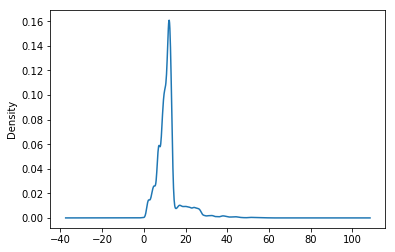

In [33]:
%matplotlib inline
nyc3.score.plot(kind='density')

Text(0.5, 1.0, 'Distribution Plot of Scores')

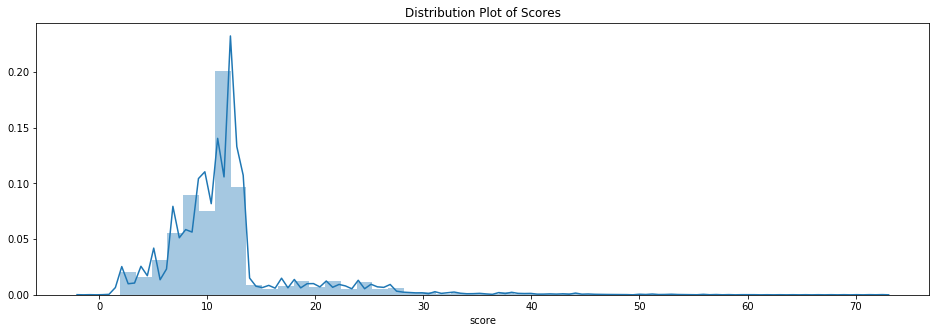

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.distplot(nyc3.score)
plt.title("Distribution Plot of Scores")

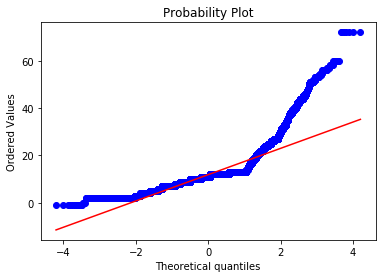

In [35]:
stats.probplot(nyc3.score, dist="norm", plot=plt)
plt.show()

In [36]:
nyc3_z= nyc3.drop(['id','name','zipcode','cuisine_description','inspection_date'],axis=1)
nyc3_z.head()

,score,Critical,Not Critical,A,B,C,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
6,39.0,1,0,0,0,1,0,1,0,0,0
7,12.0,1,0,1,0,0,0,0,0,0,1
13,10.0,0,1,1,0,0,0,1,0,0,0
14,4.0,0,1,1,0,0,0,1,0,0,0
15,9.0,0,1,1,0,0,1,0,0,0,0


In [37]:
nyc3_z.columns

Index(['score', 'Critical', 'Not Critical', 'A', 'B', 'C', 'BRONX', 'BROOKLYN',
       'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype='object')

In [38]:
from sklearn import preprocessing 
standard_scaler = preprocessing.StandardScaler()

In [39]:
nyc3_z[['score', 'Critical', 'Not Critical', 'A', 'B', 'C', 'BRONX', 'BROOKLYN',
       'MANHATTAN', 'QUEENS', 'STATEN ISLAND']] = standard_scaler.fit_transform(nyc3_z[['score', 'Critical', 'Not Critical', 'A', 'B', 'C', 'BRONX', 'BROOKLYN',
       'MANHATTAN', 'QUEENS', 'STATEN ISLAND']])
nyc3_z.head()

,score,Critical,Not Critical,A,B,C,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
6,4.284824,0.962891,-0.962891,-2.408001,-0.36569,5.772442,-0.317295,1.722044,-0.804065,-0.547714,-0.184534
7,0.016000,0.962891,-0.962891,0.415282,-0.36569,-0.173237,-0.317295,-0.580705,-0.804065,-0.547714,5.419062
13,-0.300209,-1.038539,1.038539,0.415282,-0.36569,-0.173237,-0.317295,1.722044,-0.804065,-0.547714,-0.184534
14,-1.248837,-1.038539,1.038539,0.415282,-0.36569,-0.173237,-0.317295,1.722044,-0.804065,-0.547714,-0.184534
15,-0.458314,-1.038539,1.038539,0.415282,-0.36569,-0.173237,3.151641,-0.580705,-0.804065,-0.547714,-0.184534


In [40]:
from scipy.stats import normaltest
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(nyc3_z.score)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.7694293260574341, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [41]:
corr_mat = nyc3_z.corr()

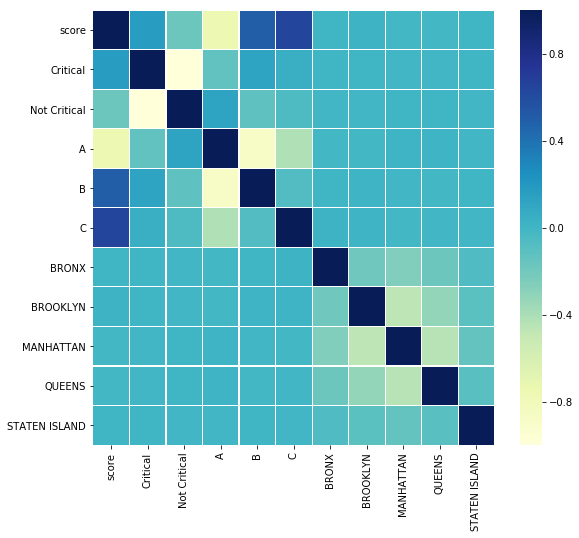

In [42]:
# plot results 
%matplotlib inline
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [43]:
nyc3[['Critical', 'score']].corr()

,Critical,score
Critical,1.000000,0.175298
score,0.175298,1.000000


In [44]:
nyc3[['Not Critical', 'score']].corr()

,Not Critical,score
Not Critical,1.000000,-0.175298
score,-0.175298,1.000000


In [45]:
nyc3[['A', 'score']].corr()

,A,score
A,1.000000,-0.754953
score,-0.754953,1.000000


In [46]:
nyc3[['B', 'score']].corr()

,B,score
B,1.000000,0.493546
score,0.493546,1.000000


In [47]:
nyc3[['C', 'score']].corr()

,C,score
C,1.000000,0.643362
score,0.643362,1.000000


In [48]:
nyc3[['MANHATTAN', 'score']].corr()

,MANHATTAN,score
MANHATTAN,1.000000,-0.010356
score,-0.010356,1.000000


In [49]:
nyc3[['BRONX', 'score']].corr()

,BRONX,score
BRONX,1.000000,0.006911
score,0.006911,1.000000


In [50]:
nyc3[['BROOKLYN', 'score']].corr()

,BROOKLYN,score
BROOKLYN,1.000000,0.019557
score,0.019557,1.000000


In [51]:
nyc3[['QUEENS', 'score']].corr()

,QUEENS,score
QUEENS,1.000000,-0.014993
score,-0.014993,1.000000


In [52]:
nyc3[['STATEN ISLAND', 'score']].corr()

,STATEN ISLAND,score
STATEN ISLAND,1.000000,0.004983
score,0.004983,1.000000


In [54]:
#drop outliers
len(nyc3[abs(nyc3.score) > 20])

0

In [55]:
nyc3.drop(nyc3[abs(nyc3.score) > 20].index,inplace = True)

In [56]:
nyc3.describe()

,score,Critical,Not Critical,B,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
count,5.323200e+04,5.323200e+04,5.323200e+04,5.323200e+04,5.323200e+04,5.323200e+04,5.323200e+04,5.323200e+04,5.323200e+04
mean,9.484198e-17,1.267634e-15,-1.267634e-15,-6.522289e-16,1.312054e-15,1.753728e-15,2.829158e-15,-1.831259e-15,-1.377256e-15
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-2.039360e+00,-1.038539e+00,-9.628912e-01,-3.656904e-01,-3.172950e-01,-5.807053e-01,-8.040648e-01,-5.477136e-01,-1.845338e-01
25%,-4.583139e-01,-1.038539e+00,-9.628912e-01,-3.656904e-01,-3.172950e-01,-5.807053e-01,-8.040648e-01,-5.477136e-01,-1.845338e-01
50%,-1.421047e-01,9.628912e-01,-9.628912e-01,-3.656904e-01,-3.172950e-01,-5.807053e-01,-8.040648e-01,-5.477136e-01,-1.845338e-01
75%,1.741046e-01,9.628912e-01,1.038539e+00,-3.656904e-01,-3.172950e-01,1.722044e+00,1.243681e+00,-5.477136e-01,-1.845338e-01
max,9.502276e+00,9.628912e-01,1.038539e+00,2.734554e+00,3.151641e+00,1.722044e+00,1.243681e+00,1.825772e+00,5.419062e+00


In [57]:
nyc3_y = pd.DataFrame(nyc3,
                 columns=["score"])
nyc3_y.head()

,score
6,4.284824
7,0.016000
13,-0.300209
14,-1.248837
15,-0.458314


Text(0.5, 1.0, 'Manhattan and Score')

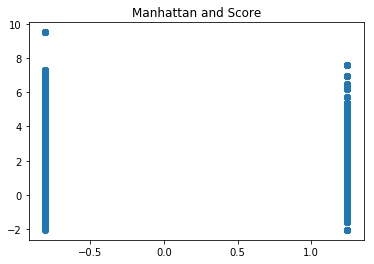

In [58]:
# plot each column vs target 
plt.scatter(nyc3_x.MANHATTAN, nyc3_y.score)
plt.title("Manhattan and Score")

Text(0.5, 1.0, 'Brooklyn and Score')

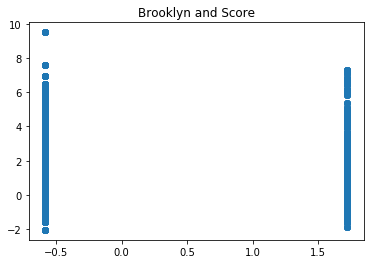

In [59]:
plt.scatter(nyc3_x.BROOKLYN, nyc3_y.score)
plt.title("Brooklyn and Score")

Text(0.5, 1.0, 'Bronx and Score')

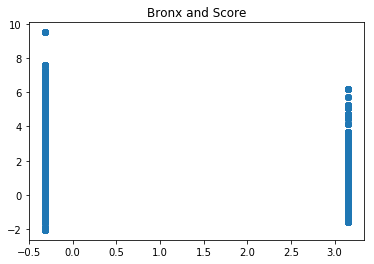

In [60]:
plt.scatter(nyc3_x.BRONX, nyc3_y.score)
plt.title("Bronx and Score")

Text(0.5, 1.0, 'Queens and Score')

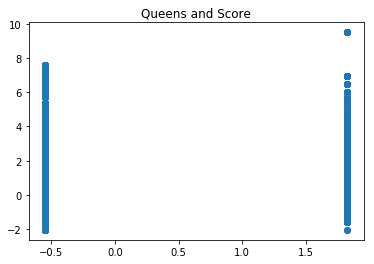

In [61]:
plt.scatter(nyc3_x.QUEENS, nyc3_y.score)
plt.title("Queens and Score")

Text(0.5, 1.0, 'B and Score')

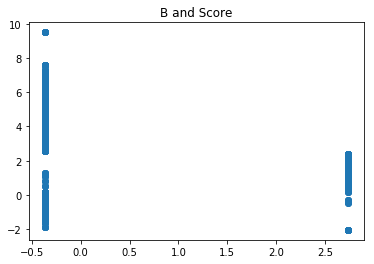

In [62]:
plt.scatter(nyc3_x.B, nyc3_y.score)
plt.title("B and Score")

Text(0.5, 1.0, 'Critical and Score')

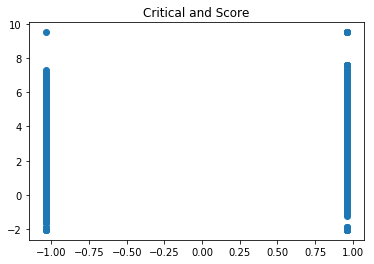

In [63]:
plt.scatter(nyc3_x.Critical, nyc3_y.score)
plt.title("Critical and Score")

IV. Linear Regression (or supplement with another appropriate model) 
- Create your model
- Visualize results
- Examine error
- Check and plot residuals

In [79]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

ValueError: endog and exog matrices are different sizes

In [80]:
cols=['Critical','Not Critical','B','MANHATTAN','BRONX','BROOKLYN','QUEENS','STATEN ISLAND'] 
X=os_nyc3_X[cols]
y=os_nyc3_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

NameError: name 'os_nyc3_X' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

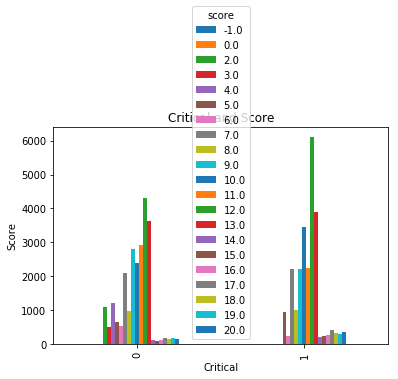

In [77]:
pd.crosstab(nyc3.Critical,nyc3.score).plot(kind='bar')
plt.title('Critical and Score')
plt.xlabel('Critical')
plt.ylabel('Score')
plt.savefig('cri_scor_fig')

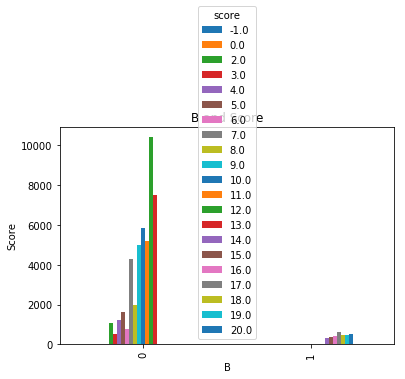

In [82]:
pd.crosstab(nyc3.B,nyc3.score).plot(kind='bar')
plt.title('B and Score')
plt.xlabel('B')
plt.ylabel('Score')
plt.savefig('b_scor_fig')

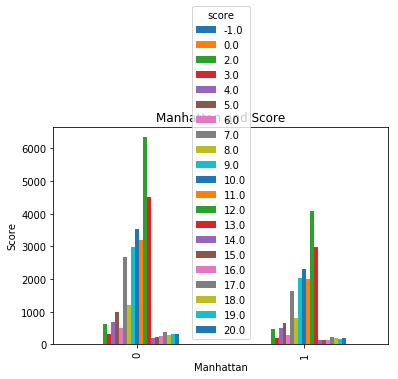

In [83]:
pd.crosstab(nyc3.MANHATTAN,nyc3.score).plot(kind='bar')
plt.title('Manhattan and Score')
plt.xlabel('Manhattan')
plt.ylabel('Score')
plt.savefig('M_scor_fig')

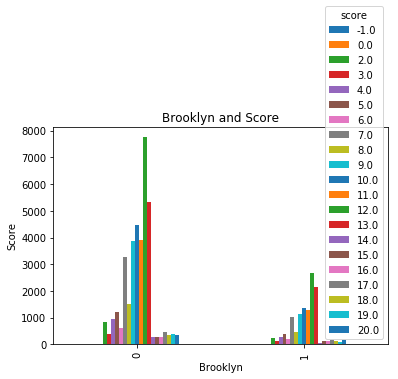

In [84]:
pd.crosstab(nyc3.BROOKLYN,nyc3.score).plot(kind='bar')
plt.title('Brooklyn and Score')
plt.xlabel('Brooklyn')
plt.ylabel('Score')
plt.savefig('brook_scor_fig')

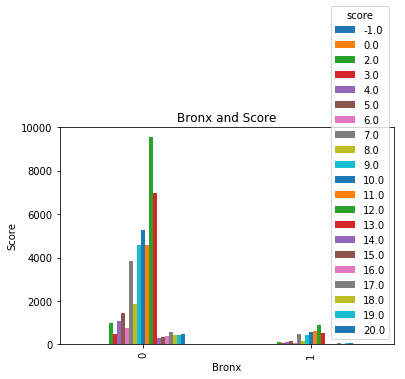

In [85]:
pd.crosstab(nyc3.BRONX,nyc3.score).plot(kind='bar')
plt.title('Bronx and Score')
plt.xlabel('Bronx')
plt.ylabel('Score')
plt.savefig('bronx_scor_fig')

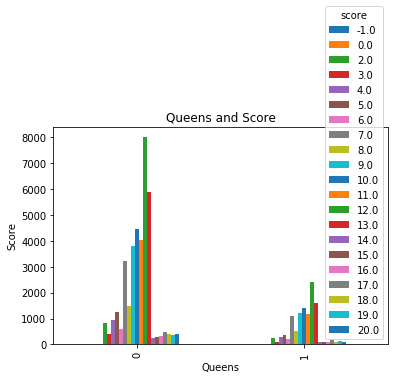

In [86]:
pd.crosstab(nyc3.QUEENS,nyc3.score).plot(kind='bar')
plt.title('Queens and Score')
plt.xlabel('Queens')
plt.ylabel('Score')
plt.savefig('q_scor_fig')

# V. Analysis

The reason why I chose this dataset is that I am very interested in the food industry and DPOHMH's practice in NYC. The file contains a large data set, which gives me the richness to investigate in the relations between investigation score and other variables. After looking through the data dictionary provided by governmetnal agencey - DPOHMH, I did not find the explanation on how the score was given based on each investigation. Score the only interval data in this data set, and I made other variables (the ones I did not drop and are related to my questions) as dummy variables in seperate columns. For the convenience of shortened running time on Python, I also sliced the dataset that spans 7 years into the very recent year, August 2016 ~ August 2017. 

Although data dictionary does not explain on "score" and its implication, a positive correlation between "Critical" and "score", as well as a negative correlation between "Grade A" and "score" are found. As a result, I conclude that the more violations DPOHMH found, the higher the score will be, and the more negative impact the restaurant/establishment would have on its grading. In short, a high score from investigation is not desirable for the restaurant. 

'Score' has a right skewed distribution. The score distribution ranges from -1 to 72 with a mean and mode of 12. From my p-value test, 'Score distribution' does not look like a Gaussian distribution. In order to cut the outliers, I observed from the plot that score's frequency drops significantly at 20. Therefore, I filtered the datapoints above score 20 to avoid the outliers 20~72. Due to the categroical data and dummy columns, a linear regression model is not a good fit for my variables. I also dropped column "A" and "C", because they are highly correlated with "Score". It also make sense when Grade A restaurants receive low scores due to their high maintainence and standards, and Grade C restaurants receive high score due to their worrisome hygenie or health risks.

When I tried to run the logistic regression, I ran into an error that I cannot solve until now. I found other people's code on google and chose the crosstab.plot at the end to compare predictability of each dummy variable on "Score". 

    - When a restaurant has a score of 10 or above 10, it is very likely to receive a "Critical" status on the investigation. Although 12 is the mean score in this dataset, a score of 12 is not desirable for any restaurant/establishment owners. 
    - When a restaurant has B rating, it's very likely to receive a score above 14. 
    - The location of Manhattan is not a differentiator between higher or lower scores that a restaurant/establishment would receive in any other borough. And same pattern applies to the other boroughs, including the Queens, Bronx, Brooklyn, and Staten Island. 

If I am going to investigate more in the same dataset, I would spend more time on the cuisine_description columns and divide them into major categories, like "Asian", "European", "Middle Eastern", "Fast Food", etc. I am curious about debunking the myth whether ethic foods tend to have higher score or less desirable inspection results. Second, I would investigate more in grouping zipcodes in the NYC area, and hypothetically divide them into 3 levels, low/middle/high-income neighborhoods, and see any correlations between scores and zipcodes.

Then, I also wonder if there is a multivariate regression model that is friendly with categorical variables. If combined with zipcode/neighborhood location and cuisine types, my model might be a more fitted one to predict score from each investigation. 